## Functions, Derivatives and Gradients

In this lesson, we will discuss the absolute fundamentals of linear algebra that apply to machine learning and AI, including:

- Functions
- Derivatives
- Gradients

### Functions

A function is a relationship between elements $x$ of a set $X$ and elements $y$ of another set $Y$.

The set $X$ is formally called the **domain** of the function. E.g. $X = [-3, 3]$

The set $Y$ is formally called the **co-domain** of the function. E.g. $Y = [3, -3]$

In this case, the relationship between $x$ and $y$ is expressed as $y = -x$.

A function has a name. Typically the name used is $f$.

Given the name $f$, the relationship beetween $x$ and $y$ is expressed as

$$
y = f(x)
$$

Notes:
  - the equation above is read $y$ is equal to $f$ of $x$
  - $x$ is the *input* or *variable* of the function
  - $y$ is the *ouput* or *value* of the function
  - $f$ is the *function*


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

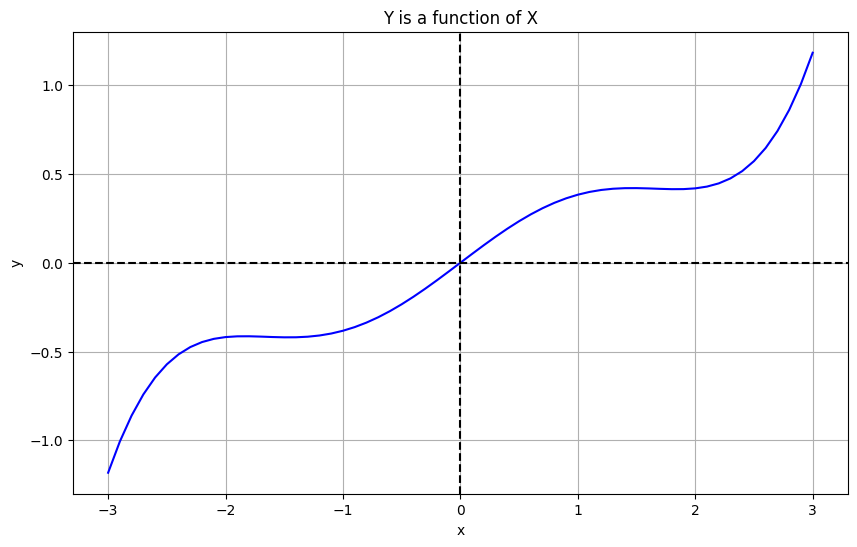

In [13]:
x = np.arange(-3, 3.1, 0.1)  # Range from -3 to 3 with steps of 0.1
y = 0.2 * (x**3) - 1.5 * x + 2 * np.sin(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')
plt.title('Y is a function of X')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.show()

The graph above displays a function of a single variable $x$. It is a smooth function that varies (i.e. has a value of $y$) that varies betwen -3 and 3.

### Understanding Minima in Functions

Imagine you're planning a hike along a trail that goes through hills and valleys. The graph above represents the elevation of this trail as you walk along it. Here's how we can understand minima using this example:

1. **What is a minimum?**
   A minimum is a point where the elevation is lower than the areas immediately around it. In hiking terms, it's like being in a valley.

2. **Local Minimum:**
   A local minimum is like a small valley along your hike. It's the lowest point in its immediate surroundings, but there might be even lower points elsewhere on the trail. In our graph below, these are the points marked as "Local Minimum".

3. **Global Minimum:**
   The global minimum is the absolute lowest point on the entire trail. It's the deepest valley you'll encounter during your whole hike. In our graph, this is marked as "Global Minimum".

4. **Why are minima important?**
   - In hiking, knowing where the valleys are helps you plan your energy use and rest stops.
   - In mathematics and science, finding minima can help solve many real-world problems:
     - Finding the most efficient route (lowest fuel consumption)
     - Optimizing costs in business (lowest expenses)
     - In machine learning, training algorithms often involves finding the minimum of an error function.

5. **Intuition:**
   - Think of a ball rolling down a hill. It will naturally come to rest at a minimum point.
   - In many optimization problems, we're trying to find this "resting point" where things are at their *best* (or *least costly*) state.

By understanding minima, you're grasping a fundamental concept used in many areas of science, engineering, and data analysis!

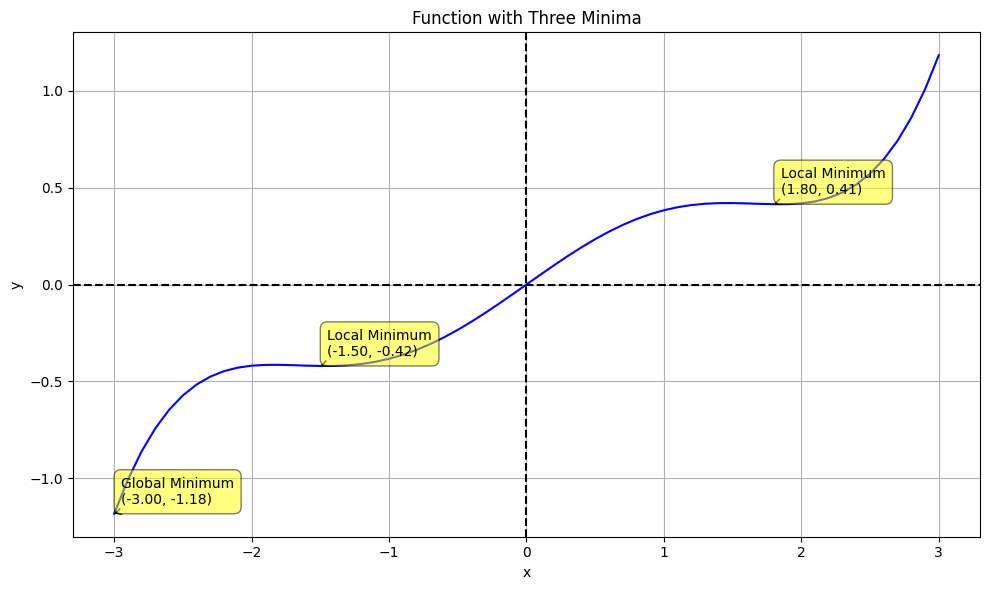

In [14]:
def custom_function(x):
    return 0.2 * (x**3) - 1.5 * x + 2 * np.sin(x)

x = np.arange(-3, 3.1, 0.1)  # Range from -3 to 3 with steps of 0.1
y = custom_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')
plt.title('Function with Three Minima')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
# Find and label local minima
local_min_x = x[np.r_[True, y[1:] < y[:-1]] & np.r_[y[:-1] < y[1:], True]]
local_min_y = custom_function(local_min_x)

for i, (x_val, y_val) in enumerate(zip(local_min_x, local_min_y)):
    if i == np.argmin(local_min_y):
        label = f'Global Minimum\n({x_val:.2f}, {y_val:.2f})'
    else:
        label = f'Local Minimum\n({x_val:.2f}, {y_val:.2f})'
    plt.annotate(label, (x_val, y_val), xytext=(5, 5), 
                 textcoords='offset points', ha='left', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

The graph above shows a function with three minima. The global minimum is the lowest point on the graph, and the local minima are the other two points. 

Before we move on, lets briefly touch on the concept of scalar and vector functions.

A *scalar function* is a function that takes a single input and returns a single output.

A *vector function* is a function that takes a single input and returns a vector output.

We will discuss Vectors in more detail in another lesson.

## Derivatives and Gradients

The *derivative* of a function is a measure of how much the output of the function changes as the input changes. It tells us how steep the function is at a given point.

The derivative of a function $f$ with respect to $x$ is denoted as $f'(x)$.

In another words, the derivative of a function $f$ is another function $f'$ that describes how fast $f$ grows or decreases as $x$ changes.

The process of finding the derivative of a function is called *differentiation*.

The derivative of a function $f$ with respect to $x$ is defined as the limit of the difference quotient as the change in $x$ approaches zero.

$$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$

  - The derivative of a function $f$ with respect to $x$ can also be interpreted as the slope of the tangent line to the graph of $f$ at the point $x$.
  - The derivative of a function $f$ with respect to $x$ can also be interpreted as the rate of change of $f$ with respect to $x$.
  - The derivative of a function $f$ with respect to $x$ can also be interpreted as the instantaneous rate of change of $f$ with respect to $x$.

### Gradients

The *gradient* of a function is a generalization of the derivative to functions of multiple variables (i.e. functions that take multiple inputs). 

The gradient of a function is a vector that contains the partial derivatives of the function with respect to each of the input variables. So in other words, it tells us how the output of the function changes as *each* input changes.

Given a function of multiple variables:

$$
y = m_1 x_1 + m_2 x_2 + m_3 x_3 + \dots + c
$$

The gradient of the function with respect to the input variables $x_1, x_2, x_3, \dots$ is the vector:

$$
\nabla f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \frac{\partial f}{\partial x_3}, \dots \right)
$$

The gradient of a function is a vector that contains the partial derivatives of the function with respect to each of the input variables. So in other words, it tells us how the output of the function changes as *each* input changes.

### Chain Rule

The chain rule is a fundamental rule in calculus that allows us to find the derivative of a function that is composed of two or more functions. It is used to find the derivative of a function that is a composition of two or more functions.

The chain rule states that the derivative of a function composed of two or more functions is equal to the product of the derivative of the outer function and the derivative of the inner function.

So for our function

$$
y = m_1 x_1 + m_2 x_2 + m_3 x_3 + \dots + c
$$

The chain rule states that the derivative of $y$ with respect to $x_1$ is equal to the product of the derivative of $y$ with respect to $x_2$ and the derivative of $x_2$ with respect to $x_1$.

$$
\frac{dy}{dx_1} = \frac{dy}{dx_2} \cdot \frac{dx_2}{dx_1}
$$

Similarly, the derivative of $y$ with respect to $x_2$ is equal to the product of the derivative of $y$ with respect to $x_3$ and the derivative of $x_3$ with respect to $x_2$.

$$
\frac{dy}{dx_2} = \frac{dy}{dx_3} \cdot \frac{dx_3}{dx_2}
$$

And so on.

Which gives us the gradient of the function with respect to the input variables $x_1, x_2, x_3, \dots$.

$$
\nabla f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \frac{\partial f}{\partial x_3}, \dots \right)
$$


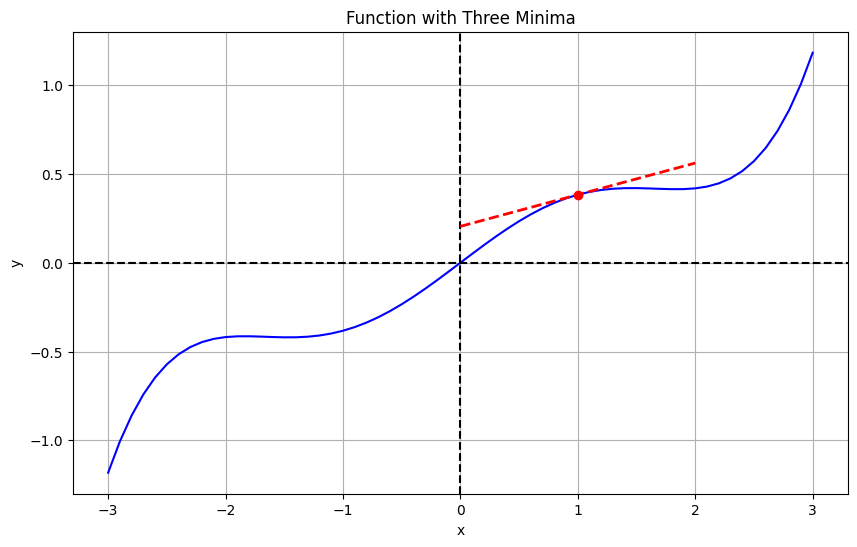

In [23]:
def custom_function(x):
    return 0.2 * (x**3) - 1.5 * x + 2 * np.sin(x)

x = np.arange(-3, 3.1, 0.1)  # Range from -3 to 3 with steps of 0.1
y = custom_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')
plt.title('Function with Three Minima')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

# Function to plot tangent line
def plot_tangent(x0, y0, slope, color='r'):
    x_tangent = np.array([x0 - 1, x0 + 1])
    y_tangent = slope * (x_tangent - x0) + y0
    plt.plot(x_tangent, y_tangent, color, linestyle='--', linewidth=2)

# show the tangent lines at x = -3.0
x1 = 1.0
h = 0.01
y1 = custom_function(x1)
slope = (custom_function(x1+h) - custom_function(x1))/h
plot_tangent(x1, y1, slope)
plt.plot(x1, y1, 'ro')  # Add a red dot at the tangent point
plt.show()